<div style="text-align: center;">
<h1>CUSTOMER SEGMENTATION PROJECT</h1>
</div>

<h5>PROJECT OBJECTIVE:</h5>
<p>Segment customers based on their purchasing behaviour to identify different groups for targeted marketing.</p>
<p>The dataset used for this project was obtained from <a href="https://archive.ics.uci.edu/dataset/352/online+retail.xlxs"/>https://archive.ics.uci.edu/dataset/352/online+retail.xlxs</a> dataset of over 500,000 entries</p>

##### Libraries and Dataset Importation

In [1]:
# Importation of all tools and libraries i will use for this project

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import dash
import seaborn as sn
import matplotlib.pyplot as plt
from dash.dependencies import Input, Output
from dash import dcc
from dash import html
import dash_bootstrap_components as dbc
from IPython.display import Image, display

In [2]:
# uploaded the dataset to my google drive just to be safe. And i read the dataset from my drive in to a dataframe

path = r"C:\Users\USER\Desktop\Portfolio\Data_Analysis_Projects\Datasets\Online Retail.xlsx"
df = pd.read_excel(path)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


##### Exploratory Data Analysis (EDA)

In [3]:
# Analyze basic statistics, distributions of features, and initial visualizations to understand the data

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##### Data Cleaning

In [5]:
# handling any missing values, duplicates, or inconsistencies. Ensuring the data is complete

df.drop_duplicates() # Get rid of duplicates

df.dropna(subset=['CustomerID'], inplace=True) # Drop rows with missing critical informatin

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convert to datetime

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]   # Get rid of negetive values


##### Feature Engineering

In [6]:
# Create meaningful features from raw data, such as total purchase frequency, average purchase value, and recency

df['TotalSpend'] =  df['Quantity'] * df['UnitPrice'] # Total money spent on each transaction

# Recency is the number of days since last purchase
# Frequency is number of times the made a purchase
# Monetary is the total money spent

# RFM Analysis
# R stands for recency, F stand for frequency, and M stand for monetary

rfm = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'TotalSpend': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'Monetary'
    })
rfm.reset_index(inplace=True)



# Standardizing the features

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

C:\Users\USER\AppData\Local\Temp\ipykernel_12800\3886793230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpend'] =  df['Quantity'] * df['UnitPrice'] # Total money spent on each transaction


##### Segmentation Techniques

In [7]:
# Applying the K-Means clustering method to segment customers base on their purchasing behavior

kmeans = KMeans(n_clusters=3, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

##### Evaluation

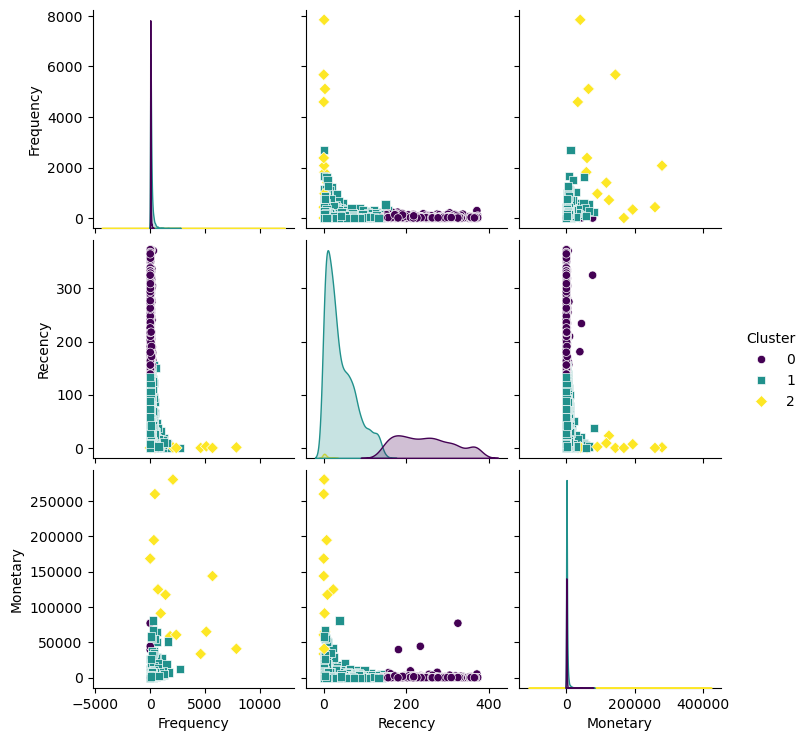

In [8]:
# Assess the quality of the clusters using visualization technique

plot_data = rfm.drop(columns=['CustomerID'])

sn.pairplot(plot_data, palette='viridis', hue='Cluster', markers=["o", "s", "D"])
plt.show()

In [9]:
# Aggregated cluster statistics

cluster_summary = plot_data.groupby('Cluster').mean().astype(int)
cluster_summary



,Frequency,Recency,Monetary
Cluster,,,
0,27,246,637
1,103,40,2028
2,2565,3,126118


**Cluster 0**:
Customers in this cluster-0 group has a low frequency of purchases or transactions (28),
purchases relatively infrequently ( recency of 246 days), and 
spent a moderate amount of money ($637).

**Cluster 1**:
Customers in this cluster-1 has purchases or transactions more frequently (103),
engages relatively recently (recency of 40), and
spends a significant amount ($2,029)

**Cluster 2**:
Customers in this cluster-2 has a very high frequency of purchases or transactions (2565),
engages very recently(recency of 4 days), and
has spent a substantial amount ($126,118)

</br>

**RECOMMENDATIONS**
- For customers in cluster-0, who appear to have lower engagement and spending with the business. To improve their activity, consider targeted re-engagement campaigns, special offers, or loyalty programs to boost their frequency and monetary value.

- For customers in cluster-1, who appear to are not the most frequent buyers but spend well and are relatively recent. increasing their engagement will be ideal by offering personalized product recommendations or exclusive deals to encourage repeat purchases.

- For customers in cluster-2, who appear to the most valuable high frequent and spending and puschased recently. it would be wise to reward them with VIP programs or personalize offers to maintain their loyalty and encourage them to continue their high-value behavior.

##### Dashboard

In [10]:

df = pd.DataFrame(rfm)

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the dashboard
app.layout = dbc.Container(
    [
        # Header
        dbc.Row(dbc.Col(html.H1("Customer Segmentation Dashboard", style={
            'textAlign': 'center',
            'fontSize': 50,
            'fontWeight': 'bold',
            'backgroundColor': '#1c2951',
            'color': 'lightgrey',
            'border': '2 solid black',
            'padding': 10,
            'marginTop': 20,
            'fontFamily': 'verdana, san-serif'
        }), className="mb-4")),

        # Key Metrics
        dbc.Row(
            [
                dbc.Col(dbc.Card(dbc.CardBody([html.H5("Total Customers"), html.H3(df['CustomerID'].nunique())], style={
                    'backgroundColor': '#784b84',
                    'textAlign': 'center',
                    'color': 'white'})), width=3),
                dbc.Col(dbc.Card(dbc.CardBody([html.H5("Total Revenue"), html.H3(f"${df['Monetary'].sum():,.0f}")], style={
                    'backgroundColor': 'green',
                    'textAlign': 'center',
                    'color': 'white'})), width=3),
                dbc.Col(dbc.Card(dbc.CardBody([html.H5("Average Frequency"), html.H3(f"{df['Frequency'].mean():.2f}")], style={
                    'backgroundColor': '#d0f0c0',
                    'textAlign': 'center',
                    'color': 'grey'})), width=3),
                dbc.Col(dbc.Card(dbc.CardBody([html.H5("Average Recency"), html.H3(f"{df['Recency'].mean():.2f}")], style={
                    'backgroundColor': '#598baf',
                    'textAlign': 'center',
                    'color': 'white'})), width=3),
            ],
            className="mb-4",
        ),

        # Revenue by Cluster Pie Chart
        dbc.Row(
            [
                dbc.Col(
                    dcc.Graph(
                        id="revenue-by-cluster",
                        figure=px.pie(
                            df,
                            values="Monetary",
                            names="Cluster",
                            title="Revenue Contribution by Cluster",
                            hole=0.4,
                        ),
                    ),
                    width=6,
                ),
                dbc.Col(
                    dcc.Graph(
                        id="customer-count-by-cluster",
                        figure=px.bar(
                            df["Cluster"].value_counts().reset_index(name='count'),
                            x="Cluster",
                            y="count",
                            labels={"index": "Cluster", "count": "Customer Count"},
                            title="Customer Distribution by Cluster",
                        ),
                    ),
                    width=6,
                ),
            ]
        ),

        # Scatter plot for Frequency vs Monetary Value
        dbc.Row(
            [
                dbc.Col(
                    dcc.Graph(
                        id="frequency-vs-monetary",
                        figure=px.scatter(
                            df,
                            x="Frequency",
                            y="Monetary",
                            color="Cluster",
                            size="Monetary",
                            hover_data=["CustomerID"],
                            title="Frequency vs Monetary Value by Cluster",
                        ),
                    ),
                    width=12,
                ),
            ]
        ),

        # Scatter plot for Recency vs Monetary Value
        dbc.Row(
            [
                dbc.Col(
                    dcc.Graph(
                        id="recency-vs-monetary",
                        figure=px.scatter(
                            df,
                            x="Recency",
                            y="Monetary",
                            color="Cluster",
                            size="Monetary",
                            hover_data=["CustomerID"],
                            title="Recency vs Monetary Value by Cluster",
                        ),
                    ),
                    width=12,
                ),
            ]
        ),

        # Table for Customer Details (optional)
        dbc.Row(
            dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        html.Div(
                            dcc.Dropdown(
                                id="customer-dropdown",
                                options=[{'label': f'Customer {i}', 'value': i} for i in df['CustomerID']],
                                placeholder="Select a Customer",
                            )
                        )
                    ),
                ),
                width=12,
            ),
        ),

        dbc.Row(
            dbc.Col(
                html.Div(id="customer-info", className="mt-4"),
                width=12,
            ),
        ),
    ],
    fluid=True,
)

# Callback to display customer-specific information
@app.callback(
    Output("customer-info", "children"),
    Input("customer-dropdown", "value")
)
def display_customer_info(customer_id):
    if customer_id is None:
        return ""
    customer = df[df['CustomerID'] == customer_id].iloc[0]
    return html.Div(
        [
            html.H4(f"Customer ID: {customer_id}"),
            html.P(f"Frequency: {customer['Frequency']}"),
            html.P(f"Recency: {customer['Recency']}"),
            html.P(f"Monetary: {customer['Monetary']}"),
            html.P(f"Cluster: {customer['Cluster']}"),
        ]
    )


if __name__ == "__main__":
    app.run_server(debug=True)

## Author's Profile

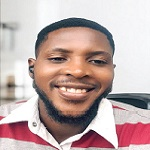

In [11]:

display(Image("C:/Users/USER/Desktop/Portfolio/Data_Analysis_Projects/Datasets/GodswillJumbo.png", alt="Author's Photo"))


### Godswill Jumbo



<div style="text-align: left; color: grey; font-style: bold; font-size: 14px; font-family: Arial; text-decoration: underline; margin-left: 30px">
CONTACT INFO
</div><br/>
<div style="text-align: left; color: grey; font-style: normal; font-size: 16px; font-family: apto; margin-left: 30px">
godswill.j@outlook.com
</br>
<a href="https://www.linkedin.com/in/godswilljumbo"/>LinkedIn Profile</a>
</br>
<a href="https://godswilljumbo.github.io"/>Github Profile</a>
</div>
</br>
</br>
</br>
</br>
<div style="text-align: center; color: grey; font-style: italic; font-size: 13px;">
    <p>&copy; 2024 Godswill Jumbo. All Rights Reserved.</p>
</div>